# Task : Predict SEX of Abalone

> First import the data and check the structure and missing values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
raw1 = pd.read_csv('abalone.csv')

In [4]:
raw1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# to strip the white spaces in column names
raw1.columns = raw1.columns.str.strip()

In [6]:
raw1.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### Initial Observations:

<ol>
<li>Total : 4177 entries</li>
<li>No missing values as per this stage</li>
<li>Categorical variable : Sex</li>
<li>Other parameters are mostly floating pt data except for 'Rings' column.</li>
</ol>

### Next few steps to follow:

1. Prepare data for learning
2. creating a pipeline for that fact
3. split data for train/test
4. Train and test on Logistic, SVC, Decision Tree, RF 
5. Compare the previous results with bagging and pasting methods
6. present and confirm a particular method or model
7. Improve the performance of models by other methods such as grid search, outliers removal or feature engineering etx.


In [8]:
raw1.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [9]:
# splitting the dataset for train and test

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(raw1, test_size=0.3, random_state = 42)

> Checking whether the split gave a representative sampling

In [10]:
train_set['Sex'].value_counts()/len(train_set)

M    0.366062
F    0.318166
I    0.315771
Name: Sex, dtype: float64

In [11]:
test_set['Sex'].value_counts()/len(test_set)

M    0.365231
I    0.334131
F    0.300638
Name: Sex, dtype: float64

> create a pipeline to encode categorical variable and scale the data

In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# prepare the training data
x_train = train_set.drop('Sex',axis = 1)
y_train = train_set[['Sex']]

pl = Pipeline([('std_scaler',StandardScaler())])
x = pl.fit_transform(x_train)

ord_enc = OrdinalEncoder()
y = ord_enc.fit_transform(y_train)

In [13]:
# prepare the testing data

x_test = test_set.drop('Sex',axis = 1)
y_test = test_set[['Sex']]

x_t = pl.fit_transform(x_test)
y_t = ord_enc.fit_transform(y_test)

In [14]:
print("shape of x train:",x.shape)
print("shape of y train:",y.shape)
print("shape of x test:",x_t.shape)
print("shape of y test:",y_t.shape)

shape of x train: (2923, 8)
shape of y train: (2923, 1)
shape of x test: (1254, 8)
shape of y test: (1254, 1)


In [15]:
ord_enc.categories_

[array(['F', 'I', 'M'], dtype=object)]

> let us train a bunch of classifiers and test the accuracy scores across

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class = 'auto')

svm_clf = SVC(gamma='scale', random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)

rnd_clf = RandomForestClassifier(n_estimators = 250, n_jobs = -1,random_state=42)

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('svc',svm_clf),('tr',tree_clf),('rf',rnd_clf)], voting='hard')

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm='SAMME.R', learning_rate=0.1)



In [ ]:
# preparing a decision boundary plotting function to view the performance for each classifier later

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [37]:
# checking the accuracy of each classifier
from sklearn.metrics import confusion_matrix

for clf in (log_clf, svm_clf, tree_clf,rnd_clf,voting_clf,ada_clf):
    
    clf.fit(x,y.ravel())
    y_pred = clf.predict(x_t)
    print(clf.__class__.__name__,": ",accuracy_score(y_t.ravel(),y_pred))
    print("Conf_mat:") 
    print(confusion_matrix(y_t, y_pred))

LogisticRegression :  0.5637958532695375
Conf_mat:
[[149  61 167]
 [ 31 345  43]
 [148  97 213]]
SVC :  0.562200956937799
Conf_mat:
[[125  50 202]
 [ 20 328  71]
 [125  81 252]]
DecisionTreeClassifier :  0.48086124401913877
Conf_mat:
[[142  53 182]
 [ 67 267  85]
 [181  83 194]]
RandomForestClassifier :  0.5406698564593302
Conf_mat:
[[153  42 182]
 [ 44 315  60]
 [177  71 210]]
VotingClassifier :  0.5454545454545454
Conf_mat:
[[174  52 151]
 [ 47 332  40]
 [188  92 178]]
AdaBoostClassifier :  0.5590111642743222
Conf_mat:
[[ 79  58 240]
 [ 13 338  68]
 [ 78  96 284]]


In [35]:
# feature importance in each 
for name,score in zip(x_train.columns, ada_clf.feature_importances_):
    print(name,':',score)

Length : 0.168
Diameter : 0.066
Height : 0.06
Whole weight : 0.154
Shucked weight : 0.198
Viscera weight : 0.184
Shell weight : 0.138
Rings : 0.032


In [26]:
for name,score in zip(x_train.columns, tree_clf.feature_importances_):
    print(name,':',score)

Length : 0.09611885284474099
Diameter : 0.08485996630672227
Height : 0.08242096812694542
Whole weight : 0.11402442576340462
Shucked weight : 0.13989324808682857
Viscera weight : 0.25504215214271414
Shell weight : 0.13242771672739503
Rings : 0.095212670001249


> **OBSERVATIONS:**
1. Better than chance predictions (33%)
2. From the confusion matrix it is evident that classifiers are good at I but confuse M and F.
3. More improvement could be done by removing some outliers
4. Plotting the decision boundaries for these classifiers might provide a better picture
5. Some feature engineering to enforce better segregation

In [61]:
# change the dataframe target column for visualization 

target_map = {'M':0, 
              'F':1,
              'I':2 }
# Use the pandas apply method to numerically encode our attrition target variable
raw1['Sex'] = raw1['Sex'].apply(lambda x: target_map[x])

### Simple EDA to check the following:

> 1. Outliers
> 2. Distribution

In [8]:
# Filtering each type into separate dfs as per sexes
M = raw1.loc[raw1['Sex']=='M',:]
F = raw1.loc[raw1['Sex']=='F',:]
I = raw1.loc[raw1['Sex']=='I',:]

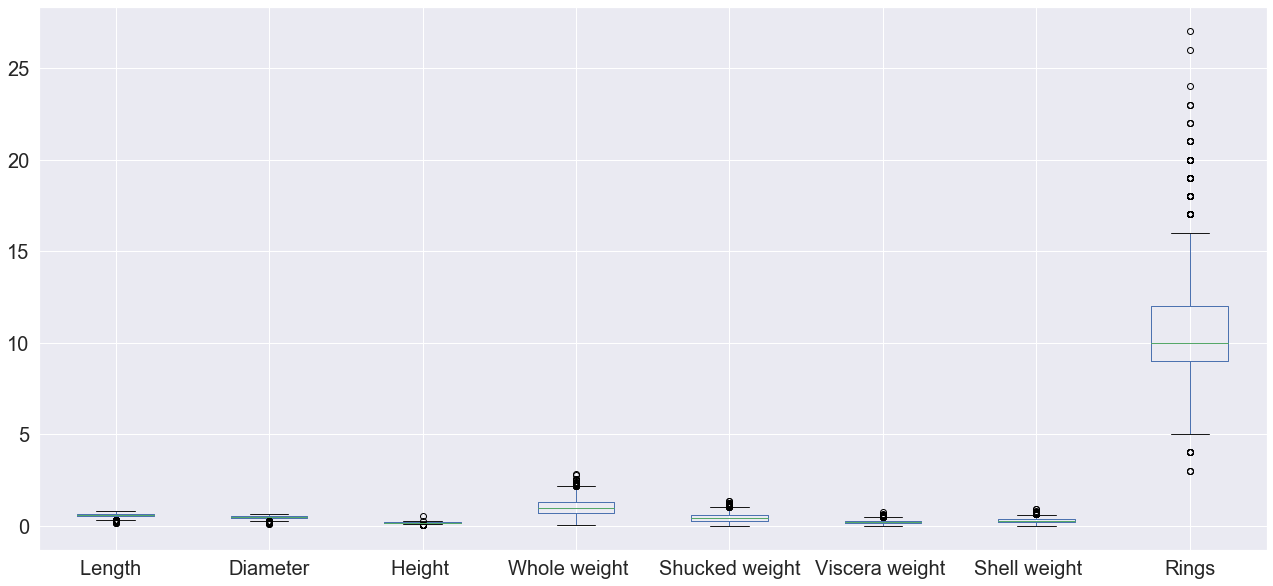

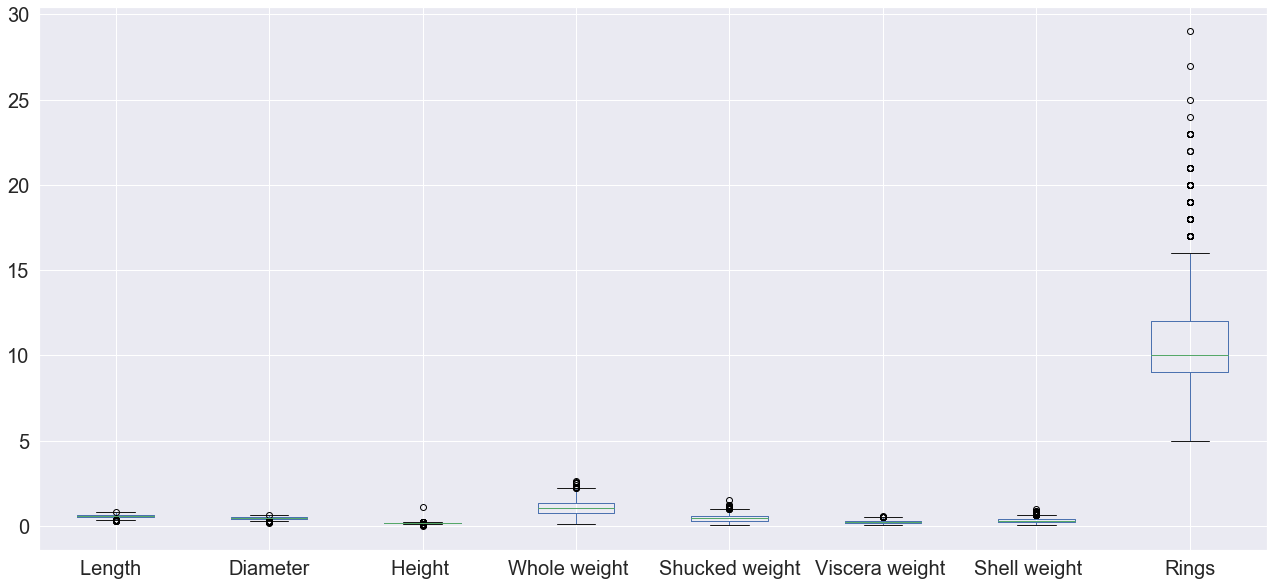

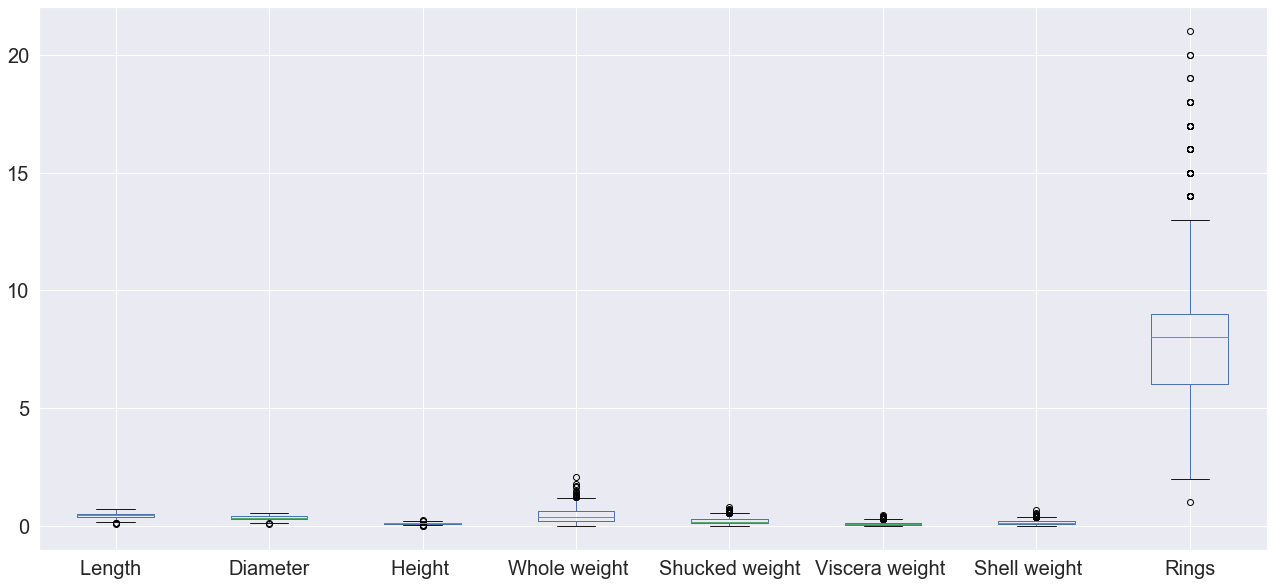

In [20]:
# Plotting Box plots for each sex

_ = raw1.loc[raw1['Sex']=='M'].plot(kind = "box", figsize = (22,10), fontsize = 20)
_ = raw1.loc[raw1['Sex']=='F'].plot(kind = "box", figsize = (22,10), fontsize = 20)
_ = raw1.loc[raw1['Sex']=='I'].plot(kind = "box", figsize = (22,10), fontsize = 20)

> **From the box plots it is evident that some values for Rings column have some outliers**

In [63]:
# Let us check the % of outliers for each category based on Rings column
IQR_M = 1.5*(M['Rings'].quantile(.75)-M['Rings'].quantile(.25))
IQR_F = 1.5*(F['Rings'].quantile(.75)-F['Rings'].quantile(.25))
IQR_I = 1.5*(I['Rings'].quantile(.75)-I['Rings'].quantile(.25))

M_outl = (M.loc[M['Rings']< (M['Rings'].quantile(0.25)-IQR_M),:]['Rings'].count()) + (M.loc[M['Rings']> (M['Rings'].quantile(0.75)+IQR_M),:]['Rings'].count())
F_outl = (F.loc[F['Rings']< (F['Rings'].quantile(0.25)-IQR_F),:]['Rings'].count()) + (F.loc[F['Rings']> (F['Rings'].quantile(0.75)+IQR_F),:]['Rings'].count())
I_outl = (I.loc[I['Rings']< (I['Rings'].quantile(0.25)-IQR_I),:]['Rings'].count()) + (I.loc[I['Rings']> (I['Rings'].quantile(0.75)+IQR_I),:]['Rings'].count())

In [67]:
print("Percentage of outlier data =",round((M_outl+F_outl+I_outl)/4177,3))

Percentage of outlier data = 0.056


In [62]:
M_outl


94

In [ ]:
plt.plot(x=M.Rings,y=)

### Preparation of the Dataset for learning

> Convert Categorial variable into numerical type

> Center and scale the data 